### Keras on MNIST datset

##### Objective : To apply multiple hidden layer [3,5,7,9...]  MLP architecture on MNIST dataset 

In [13]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# For plotting purposes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.initializers import he_normal
from keras.layers import BatchNormalization, Dense, Dropout

# Import MNIST Dataset
from keras.datasets import mnist

In [14]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [15]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of testing examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [16]:
#converting from 3d to 1*784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 

# after converting the input images from 3d to 2d vectors
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)
Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [17]:
#Normalising data
minMaxScaler = MinMaxScaler()

x_train = minMaxScaler.fit_transform(x_train)
x_test = minMaxScaler.transform(x_test)

# x_train data point after normlizing.
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [18]:
temp = y_train[0]
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print("After converting the output {0} into a vector : {1}".format(temp,y_train[0]))

After converting the output 5 into a vector : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
# Function for plotting  train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [20]:
# Defining batch size and epochs
# Batch size 
batch_size = 128 

# Number of time whole data is trained
epochs =50

# Input layer dimension 
input_dimension = x_train.shape[1]

# Output layer dimension 
output_dimension = y_train.shape[1]

#### Try 3 Hidden layer architecture

In [21]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : dense Layer
dense_layer1 = Dense(750,
                       activation="relu",
                       input_shape=(input_dimension,),
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 2nd hidden layer : dense Layer
dense_layer2 = Dense(500,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer2)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))


# Add 3rd hidden layer : dense Layer
dense_layer3 = Dense(250,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer3)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add output layer : dense Layer
dense_layer4 = Dense(output_dimension, activation='softmax')
model.add(dense_layer4)

# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 750)               588750    
_________________________________________________________________
batch_normalization_3 (Batch (None, 750)               3000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 750)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               375500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               1252

60000/60000 [==============================] - 4s 59us/step - loss: 0.0266 - acc: 0.9913 - val_loss: 0.0507 - val_acc: 0.9870
Epoch 48/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.0258 - acc: 0.9916 - val_loss: 0.0544 - val_acc: 0.9854
Epoch 49/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0565 - val_acc: 0.9856
Epoch 50/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0521 - val_acc: 0.9861


Test score: 0.05205892696186711
Test accuracy: 98.61%


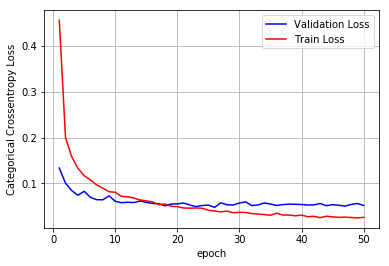

In [22]:
# Accuracy and plotting train & validation loss
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))


# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

Around 17 Epoch train error and validation error meets.

### With 5 Hidden layer

In [24]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : dense Layer
dense_layer1 = Dense(1150,
                       activation="relu",
                       input_shape=(input_dimension,),
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 2nd hidden layer : dense Layer
dense_layer2 = Dense(900,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer2)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))


# Add 3rd hidden layer : dense Layer
dense_layer3 = Dense(750,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer3)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 4th hidden layer : dense Layer
dense_layer4 = Dense(500,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer4)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 5th hidden layer : dense Layer
dense_layer5 = Dense(250,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer5)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add output layer : dense Layer
dense_layer6 = Dense(output_dimension, activation='softmax')
model.add(dense_layer6)

# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1150)              902750    
_________________________________________________________________
batch_normalization_6 (Batch (None, 1150)              4600      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1150)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 900)               1035900   
_________________________________________________________________
batch_normalization_7 (Batch (None, 900)               3600      
_________________________________________________________________
dropout_7 (Dropout)          (None, 900)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 750)               6757

60000/60000 [==============================] - 5s 89us/step - loss: 0.0315 - acc: 0.9906 - val_loss: 0.0533 - val_acc: 0.9862
Epoch 43/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0297 - acc: 0.9909 - val_loss: 0.0533 - val_acc: 0.9870
Epoch 44/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0284 - acc: 0.9916 - val_loss: 0.0603 - val_acc: 0.9856
Epoch 45/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0275 - acc: 0.9919 - val_loss: 0.0579 - val_acc: 0.9863
Epoch 46/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0263 - acc: 0.9920 - val_loss: 0.0533 - val_acc: 0.9868
Epoch 47/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0268 - acc: 0.9920 - val_loss: 0.0553 - val_acc: 0.9861
Epoch 48/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0238 - acc: 0.9927 - val_loss: 0.0567 - val_acc: 0.9871
Epoch 49/50
60000/60000 [=====================

Test score: 0.05508785108429729
Test accuracy: 98.68%


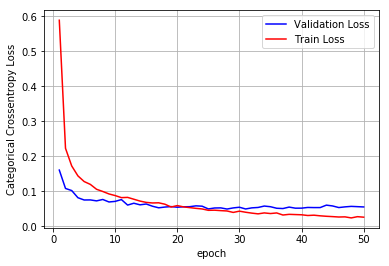

In [25]:
# Accuracy and plotting train & validation loss
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))


# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

Around 20 Epoch train error and validation error meets.

### Try 7 Hidden Layer

In [26]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : dense Layer
dense_layer1 = Dense(1250,
                       activation="relu",
                       input_shape=(input_dimension,),
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 2nd hidden layer : dense Layer
dense_layer2 = Dense(1000,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer2)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))


# Add 3rd hidden layer : dense Layer
dense_layer3 = Dense(750,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer3)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 4th hidden layer : dense Layer
dense_layer4 = Dense(500,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer4)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 5th hidden layer : dense Layer
dense_layer5 = Dense(750,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer5)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 6th hidden layer : dense Layer
dense_layer6 = Dense(500,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer6)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 7th hidden layer : dense Layer
dense_layer7 = Dense(250,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer7)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add output layer : dense Layer
dense_layer8 = Dense(output_dimension, activation='softmax')
model.add(dense_layer8)

# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1250)              981250    
_________________________________________________________________
batch_normalization_11 (Batc (None, 1250)              5000      
_________________________________________________________________
dropout_11 (Dropout)         (None, 1250)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1251000   
_________________________________________________________________
batch_normalization_12 (Batc (None, 1000)              4000      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 750)               7507

60000/60000 [==============================] - 7s 111us/step - loss: 0.0464 - acc: 0.9865 - val_loss: 0.0547 - val_acc: 0.9863
Epoch 37/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.0418 - acc: 0.9880 - val_loss: 0.0563 - val_acc: 0.9868
Epoch 38/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.0416 - acc: 0.9876 - val_loss: 0.0544 - val_acc: 0.9866
Epoch 39/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.0406 - acc: 0.9882 - val_loss: 0.0542 - val_acc: 0.9862
Epoch 40/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.0411 - acc: 0.9880 - val_loss: 0.0545 - val_acc: 0.9867
Epoch 41/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0381 - acc: 0.9891 - val_loss: 0.0505 - val_acc: 0.9862
Epoch 42/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.0367 - acc: 0.9895 - val_loss: 0.0601 - val_acc: 0.9861
Epoch 43/50
60000/60000 [==============

Test score: 0.05090733877607854
Test accuracy: 98.70%


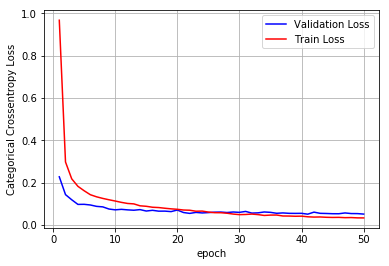

In [27]:
# Accuracy and plotting train & validation loss
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))


# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

Around 22 Epoch train error and validation error meets.

### Try 9 Hidden layer

In [28]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : dense Layer
dense_layer1 = Dense(2250,
                       activation="relu",
                       input_shape=(input_dimension,),
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 2nd hidden layer : dense Layer
dense_layer2 = Dense(2000,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer2)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))


# Add 3rd hidden layer : dense Layer
dense_layer3 = Dense(1750,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer3)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 4th hidden layer : dense Layer
dense_layer4 = Dense(1500,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer4)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 5th hidden layer : dense Layer
dense_layer5 = Dense(1250,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer5)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 6th hidden layer : dense Layer
dense_layer6 = Dense(1000,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer6)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 7th hidden layer : dense Layer
dense_layer7 = Dense(750,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer7)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 8th hidden layer : dense Layer
dense_layer8 = Dense(500,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer8)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 9th hidden layer : dense Layer
dense_layer9 = Dense(250,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer9)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add output layer : dense Layer
dense_layer10 = Dense(output_dimension, activation='softmax')
model.add(dense_layer10)

# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 2250)              1766250   
_________________________________________________________________
batch_normalization_18 (Batc (None, 2250)              9000      
_________________________________________________________________
dropout_18 (Dropout)         (None, 2250)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 2000)              4502000   
_________________________________________________________________
batch_normalization_19 (Batc (None, 2000)              8000      
_________________________________________________________________
dropout_19 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1750)              3501

60000/60000 [==============================] - 14s 231us/step - loss: 0.0528 - acc: 0.9855 - val_loss: 0.0569 - val_acc: 0.9863
Epoch 31/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.0481 - acc: 0.9866 - val_loss: 0.0690 - val_acc: 0.9833
Epoch 32/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.0491 - acc: 0.9861 - val_loss: 0.0603 - val_acc: 0.9857
Epoch 33/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.0483 - acc: 0.9870 - val_loss: 0.0535 - val_acc: 0.9864
Epoch 34/50
60000/60000 [==============================] - 14s 230us/step - loss: 0.0466 - acc: 0.9869 - val_loss: 0.0571 - val_acc: 0.9851
Epoch 35/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.0431 - acc: 0.9885 - val_loss: 0.0571 - val_acc: 0.9847
Epoch 36/50
60000/60000 [==============================] - 14s 230us/step - loss: 0.0426 - acc: 0.9885 - val_loss: 0.0580 - val_acc: 0.9858
Epoch 37/50
60000/60000 [=======

Test score: 0.06052361094756052
Test accuracy: 98.62%


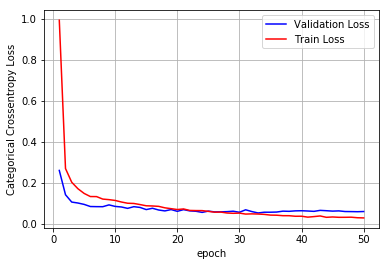

In [29]:
# Accuracy and plotting train & validation loss
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))


# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

Around 18 Epoch train error and validation error meets.

# Summary

In [32]:
print("Activation function= Relu")
print("Epochs= 50")
print("Batch size= 128")
print("Dropout = 0.5")
print("Batch Normalization")

from prettytable import PrettyTable
x=PrettyTable()
x.field_names = ["Hidden layers","Test accuracy","Optimal_epochs"]
x.add_row(["3 Hidden layers","98.61%","17"])
x.add_row(["5 Hidden layers","98.68%","20"])
x.add_row(["7 Hidden layers","98.70%","22"])
x.add_row(["9 Hidden layers","98.62%","18"])

print(x)

Activation function= Relu
Epochs= 50
Batch size= 128
Dropout = 0.5
Batch Normalization
+-----------------+---------------+----------------+
|  Hidden layers  | Test accuracy | Optimal_epochs |
+-----------------+---------------+----------------+
| 3 Hidden layers |     98.61%    |       17       |
| 5 Hidden layers |     98.68%    |       20       |
| 7 Hidden layers |     98.70%    |       22       |
| 9 Hidden layers |     98.62%    |       18       |
+-----------------+---------------+----------------+
